In [1]:
import os
os.chdir('../../../..')

from Simulation.libraries.Environment import *
from ExperimentTools.pc_and_maze_creation.tools.path_planning.MazePaths import *
import numpy as np
from matplotlib.collections import LineCollection
import pickle

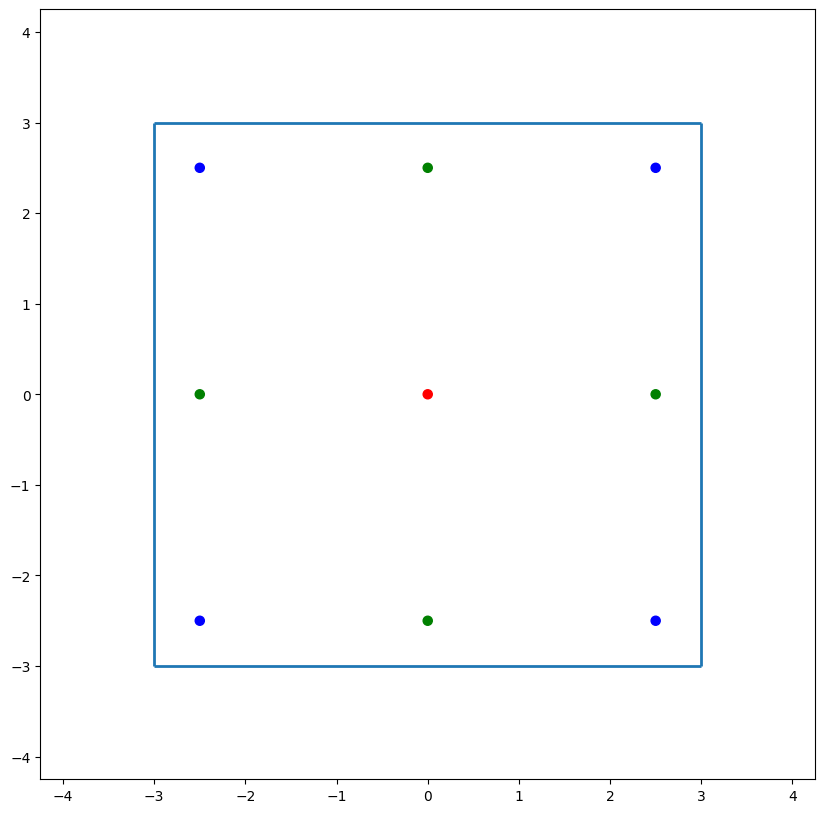

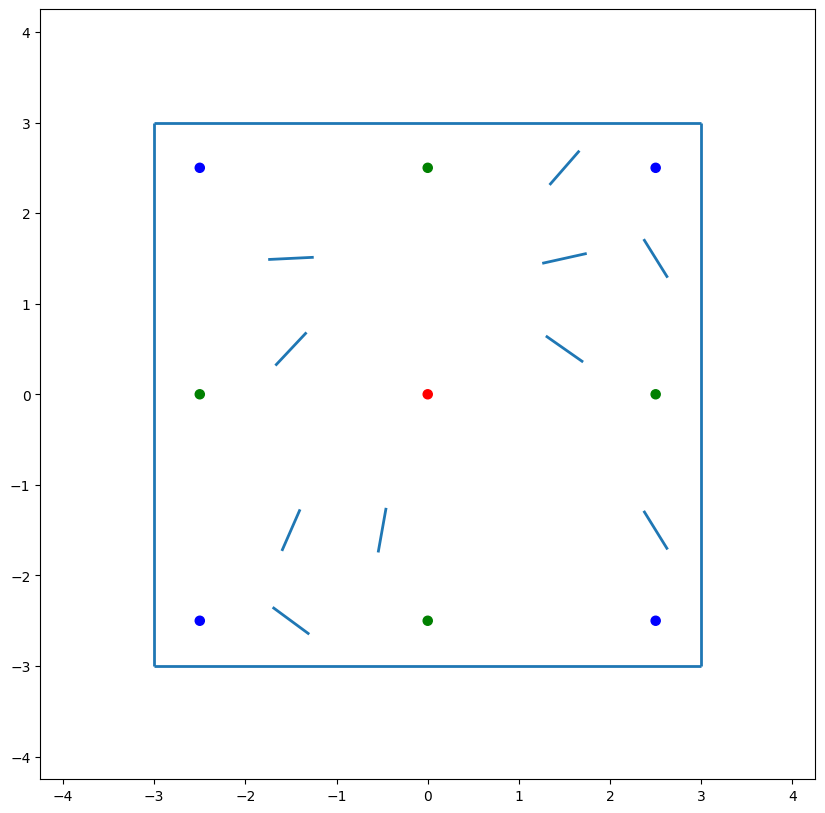

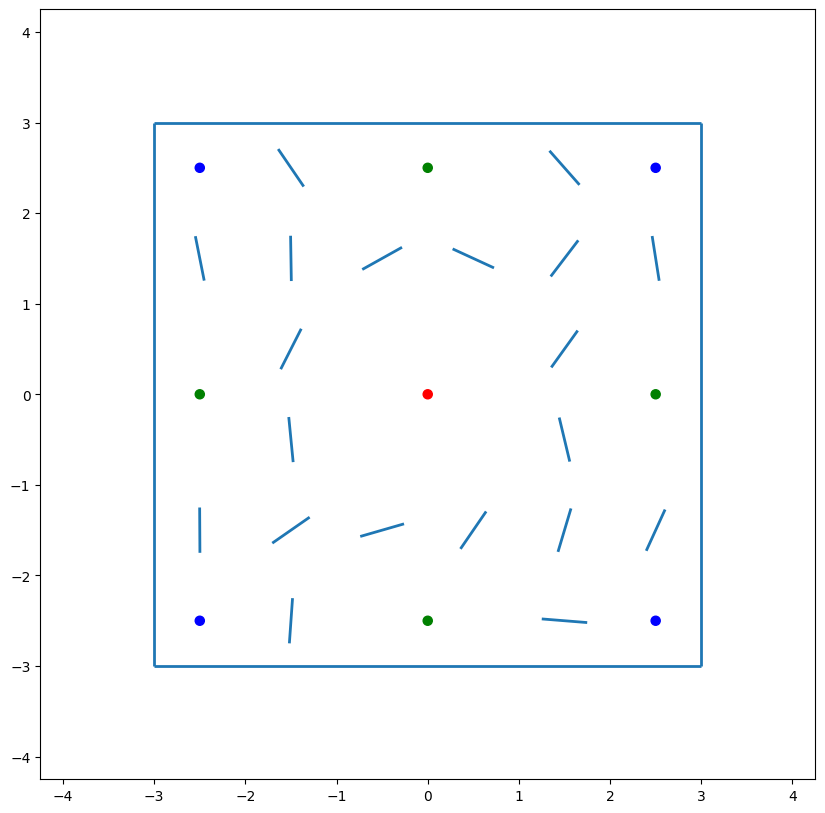

In [2]:
maze_files = ['WM00_paths.pkl','WM10_paths.pkl','WM20_paths.pkl']
mazes = []
for maze_file in maze_files:
    with open('Simulation/worlds/mazes/Experiment1/Paths/'+maze_file,'rb') as file:
        mazes.append(pickle.load(file))

In [3]:
name_index = 0
for maze in mazes:
    for path in maze.paths:
        x = []
        y = []
        for point in path.path:
            x.append(point[0])
            y.append(point[1])
        segs = [np.column_stack([x,y])]
        line_segments = LineCollection(segs, colors='blue',
                                   linewidths=(0.5, 1, 1.5, 2),
                                   linestyles='solid')
        save_name = maze_files[name_index].split('.')[0]
        maze.maze.maze_figure.suptitle('Shortest Paths',fontsize=20)
        maze.maze.maze_figure_ax.add_collection(line_segments)
    maze.maze.maze_figure.savefig('Simulation/DataCache/'+save_name +'.png')
    name_index += 1